In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from tifffile import imread
from csbdeep.utils import Path, download_and_extract_zip_file, plot_some
from csbdeep.io import save_tiff_imagej_compatible
from csbdeep.models import CARE

Using TensorFlow backend.


image size = (26, 2048, 2048)
image axes = ZYX


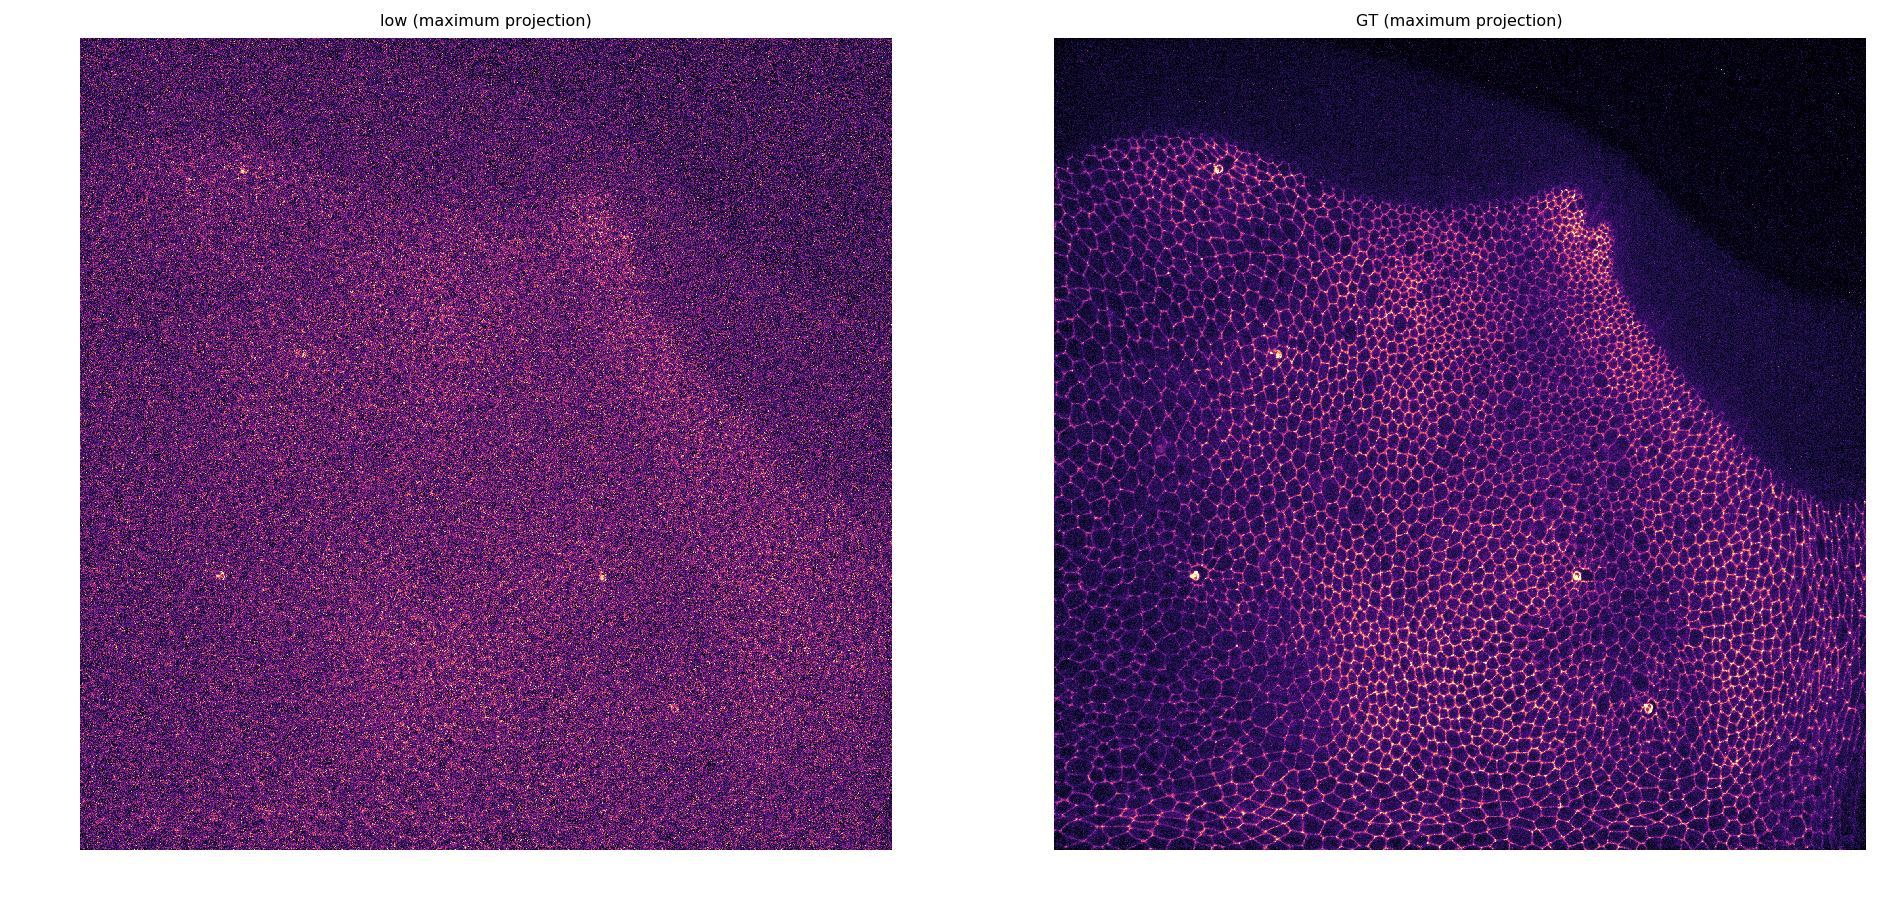

In [2]:
y = imread('/data/u934/service_imagerie/v_kapoor/PairTestData/GT/40x_bin1_05_5min_2_w2CSU-488_s1_t27.tif')
x = imread('/data/u934/service_imagerie/v_kapoor/PairTestData/Low/40x_bin1_05_5min_2_w2CSU-488_s1_t27.tif')

axes = 'ZYX'
print('image size =', x.shape)
print('image axes =', axes)

plt.figure(figsize=(16,10))
plot_some(np.stack([x,y]),
          title_list=[['low (maximum projection)','GT (maximum projection)']], 
          pmin=2,pmax=99.8);

In [3]:
model = CARE(config=None, name='DenoisingS1S2_model', basedir='models')

Loading network weights from 'weights_best.h5'.


In [4]:
%%time
restored = model.predict(x, axes)

Out of memory, retrying with n_tiles = 4
Out of memory, retrying with n_tiles = 8
Out of memory, retrying with n_tiles = 16
CPU times: user 1min 19s, sys: 43.4 s, total: 2min 2s
Wall time: 2min 22s


In [5]:
Path('/data/u934/service_imagerie/v_kapoor/PairTestData/results').mkdir(exist_ok=True)
save_tiff_imagej_compatible('/data/u934/service_imagerie/v_kapoor/PairTestData/results/%s_40x_bin1_05_5min_2_w2CSU-488_s1_t27.tif' % model.name, restored, axes)

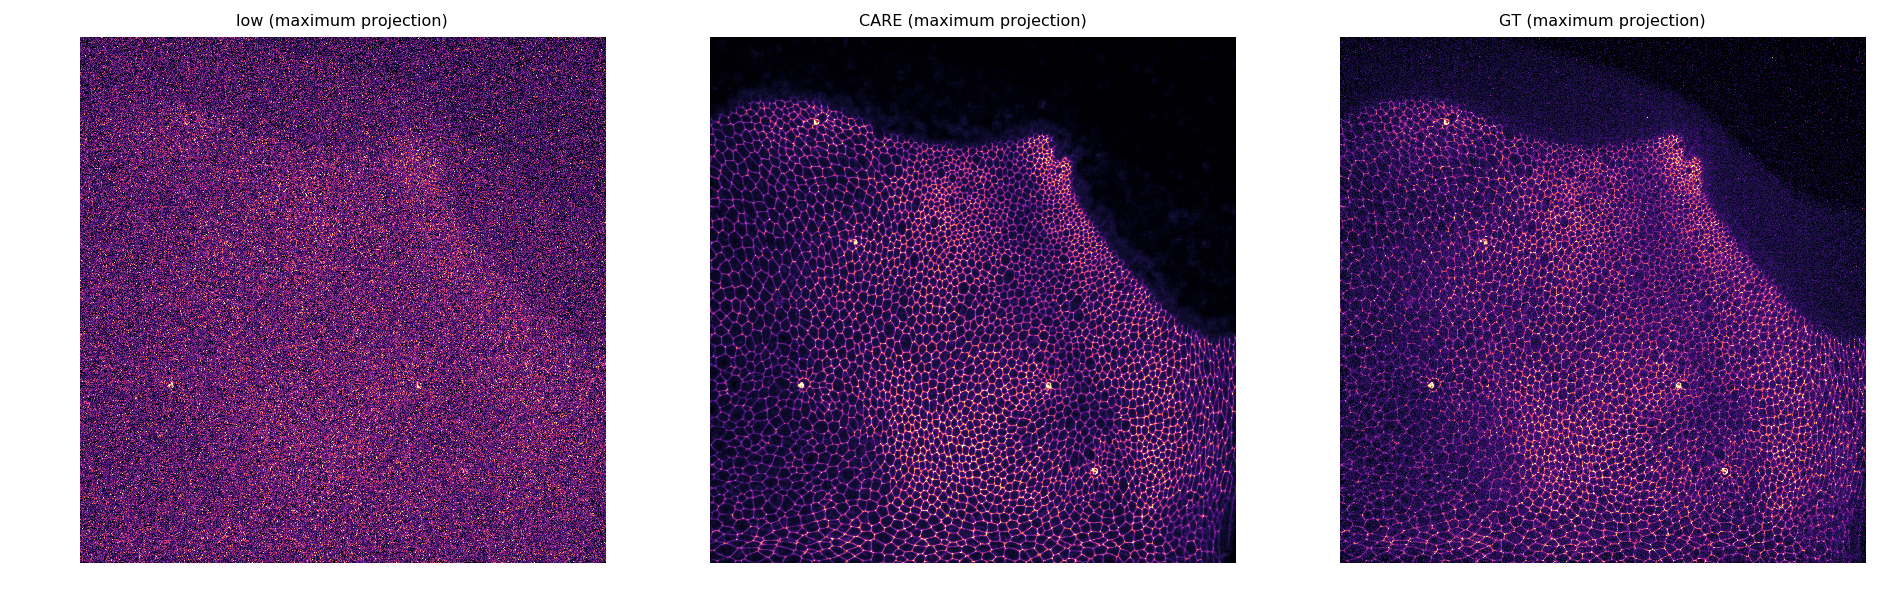

In [6]:
plt.figure(figsize=(16,10))
plot_some(np.stack([x,restored,y]),
          title_list=[['low (maximum projection)','CARE (maximum projection)','GT (maximum projection)']], 
          pmin=2,pmax=99.8);